In [ ]:
import pandas as pd
import numpy as np
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

'''

***Libraries/Modules and their Uses***
Pandas and Numpy for data handling and manipulation
shap for summary plot of the model
Seaborn and Matplotlib for plotting and visualisations
train_test_split for splitting the dataset
RandomForestRegressor , GradientBoostingRegressor , XGBRegressor , LGBMRegressor are the ensemble models
r2_score is the main metric being used to evaluate the models
LabelEncoder for encoding categorical columns, crops seasons etc..
permutation_importance for plotting the important features

'''

In [ ]:
df=pd.read_csv("final_merged.csv")
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Whole Year,Winter,Summer,Kharif,Rabi,Rainfall,so2,no2,rspm,spm,pm2_5
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,2763.2,227.2,812.2,1244.2,479.5,1244.2,0.0,0.0,0.0,0.0,0.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,2763.2,227.2,812.2,1244.2,479.5,1244.2,0.0,0.0,0.0,0.0,0.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2763.2,227.2,812.2,1244.2,479.5,1244.2,0.0,0.0,0.0,0.0,0.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,2763.2,227.2,812.2,1244.2,479.5,2763.2,0.0,0.0,0.0,0.0,0.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,2763.2,227.2,812.2,1244.2,479.5,2763.2,0.0,0.0,0.0,0.0,0.0


In [5]:
df.fillna(0, inplace=True)
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Whole Year,Winter,Summer,Kharif,Rabi,Rainfall,so2,no2,rspm,spm,pm2_5
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,2763.2,227.2,812.2,1244.2,479.5,1244.2,0.0,0.0,0.0,0.0,0.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,2763.2,227.2,812.2,1244.2,479.5,1244.2,0.0,0.0,0.0,0.0,0.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2763.2,227.2,812.2,1244.2,479.5,1244.2,0.0,0.0,0.0,0.0,0.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,2763.2,227.2,812.2,1244.2,479.5,2763.2,0.0,0.0,0.0,0.0,0.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,2763.2,227.2,812.2,1244.2,479.5,2763.2,0.0,0.0,0.0,0.0,0.0


In [ ]:
'''Encoding the categorical columns'''
le=LabelEncoder()
df['Crop']=le.fit_transform(df['Crop']) 
df['Season']=le.fit_transform(df['Season'])
df['Pollutants']=df['so2'] + df['no2'] + df['rspm'] + df['spm'] + df['pm2_5']
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Whole Year,Winter,Summer,Kharif,Rabi,Rainfall,so2,no2,rspm,spm,pm2_5,Pollutants
0,Andaman and Nicobar Islands,NICOBARS,2000,1,2,1254.0,2000.0,2763.2,227.2,812.2,1244.2,479.5,1244.2,0.0,0.0,0.0,0.0,0.0,0.0
1,Andaman and Nicobar Islands,NICOBARS,2000,1,74,2.0,1.0,2763.2,227.2,812.2,1244.2,479.5,1244.2,0.0,0.0,0.0,0.0,0.0,0.0
2,Andaman and Nicobar Islands,NICOBARS,2000,1,95,102.0,321.0,2763.2,227.2,812.2,1244.2,479.5,1244.2,0.0,0.0,0.0,0.0,0.0,0.0
3,Andaman and Nicobar Islands,NICOBARS,2000,4,7,176.0,641.0,2763.2,227.2,812.2,1244.2,479.5,2763.2,0.0,0.0,0.0,0.0,0.0,0.0
4,Andaman and Nicobar Islands,NICOBARS,2000,4,22,720.0,165.0,2763.2,227.2,812.2,1244.2,479.5,2763.2,0.0,0.0,0.0,0.0,0.0,0.0


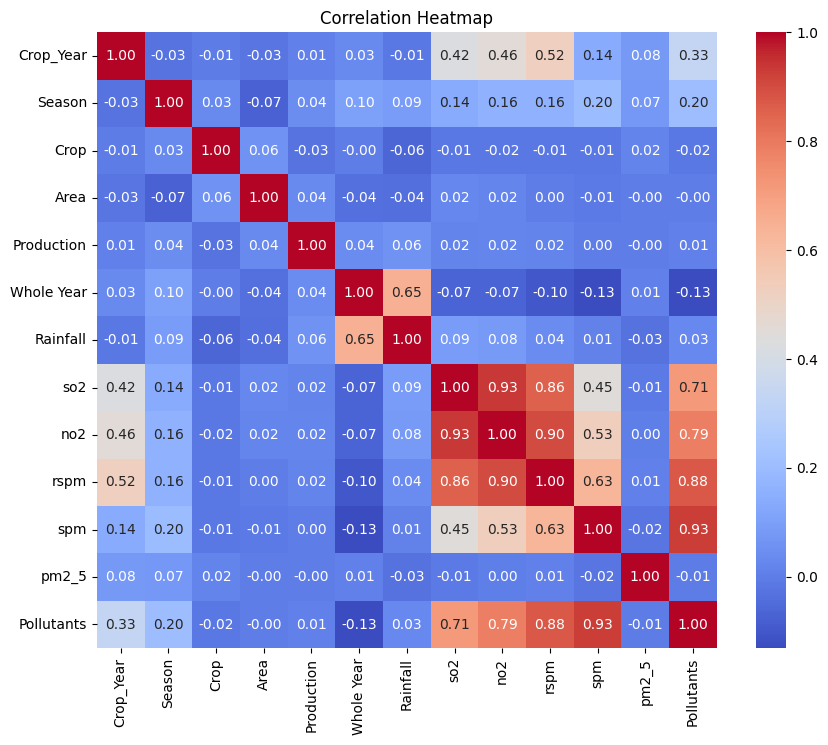

In [ ]:
''' Plotting a correlation matrix to get a rough idea about the important features'''
new_df=df.drop(['State_Name','District_Name','Winter','Summer','Kharif','Rabi'],axis=1)
corr=new_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
X = df.drop(['Production', 'State_Name', 'District_Name', 'Crop_Year'], axis=1)
y = df['Production']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
'''Th models, after their first pass and review, the best models are trained below, with changing hyperparameters'''
models={
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=6),
    "LightGBM": LGBMRegressor(n_estimators=200, learning_rate=0.05, max_depth=6),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6)
}

In [42]:
results=dict()
ydict=dict()
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} Trained!")
    y_pred = model.predict(X_test)
    rmse = (mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2 Score": r2}
    ydict[name]={"ypred" : y_pred}
results

Random Forest Trained!
Gradient Boosting Trained!
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3129
[LightGBM] [Info] Number of data points in the train set: 313585, number of used features: 15
[LightGBM] [Info] Start training from score 429977.455658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

{'Random Forest': {'RMSE': 31015827892976.773, 'R2 Score': 0.8278748265141584},
 'Gradient Boosting': {'RMSE': 20422498331324.562,
  'R2 Score': 0.8866634777435833},
 'LightGBM': {'RMSE': 31221991518278.207, 'R2 Score': 0.8267307026205798},
 'XGBoost': {'RMSE': 18680151652658.383, 'R2 Score': 0.8963327899854728}}

In [ ]:
'''Second best performing model'''
model=GradientBoostingRegressor(n_estimators=800, learning_rate=0.08, max_depth=6)
model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.08, max_depth=6, n_estimators=800)

In [44]:
y_pred=model.predict(X_test)
ydict['Gradient Boosting']['ypred']=y_pred
r2=r2_score(y_test,y_pred)
results['Gradient Boosting']['R2 Score']=r2
r2

0.9144491274336453

In [ ]:
'''BEST PERFORMING MODEL'''
model2=XGBRegressor(n_estimators=800, learning_rate=0.08, max_depth=6)
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
r2=r2_score(y_test,y_pred2)
ydict['Gradient Boosting']['ypred']=y_pred2
results['XGBoost']['R2 Score']=r2
r2

0.916829647740307

In [ ]:
'''Not so good'''
model3=RandomForestRegressor(n_estimators=600 ,max_depth=6)
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
r2=r2_score(y_test,y_pred3)
r2

0.7050720292205437

In [76]:
print(y_test.size)

78397


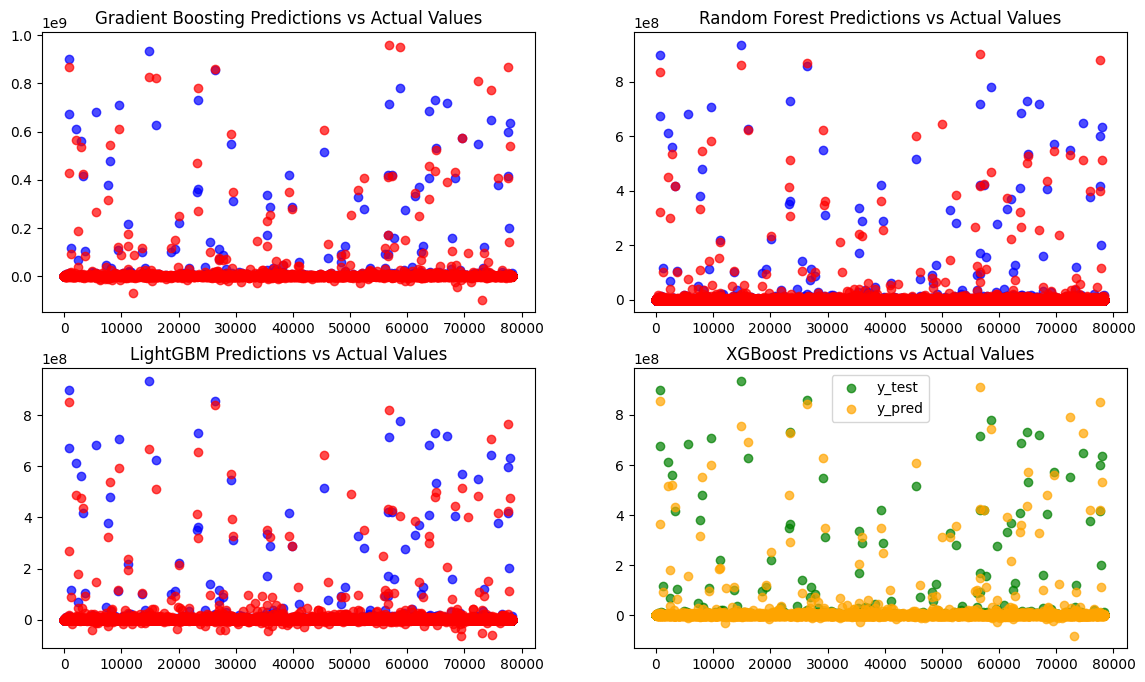

In [ ]:
'''Plotting their performances all together'''
X_plot=np.linspace(0,935000000,78397)
fig,axes=plt.subplots(2,2,figsize=(14,8))

axes[0,0].scatter(range(len(y_test)), y_test,  color='blue', alpha=0.7,label="y_test")
axes[0,0].scatter(range(len(ydict['Gradient Boosting']['ypred'])), ydict['Gradient Boosting']['ypred'],color='red',alpha=0.7,label="y_pred")
axes[0,0].set_title("Gradient Boosting Predictions vs Actual Values")

axes[0,1].scatter(range(len(y_test)), y_test,  color='blue', alpha=0.7,label="y_test")
axes[0,1].scatter(range(len(ydict['Random Forest']['ypred'])), ydict['Random Forest']['ypred'],color='red',alpha=0.7,label="y_pred")
axes[0,1].set_title("Random Forest Predictions vs Actual Values")

axes[1,0].scatter(range(len(y_test)), y_test,  color='blue', alpha=0.7,label="y_test")
axes[1,0].scatter(range(len(ydict['LightGBM']['ypred'])), ydict['LightGBM']['ypred'],color='red',alpha=0.7,label="y_pred")
axes[1,0].set_title("LightGBM Predictions vs Actual Values")


axes[1,1].scatter(range(len(y_test)), y_test,  color='green', alpha=0.7,label="y_test")
axes[1,1].scatter(range(len(ydict['XGBoost']['ypred'])), ydict['XGBoost']['ypred'],color='orange',alpha=0.7,label="y_pred")
axes[1,1].set_title("XGBoost Predictions vs Actual Values")

plt.legend()
plt.show()  


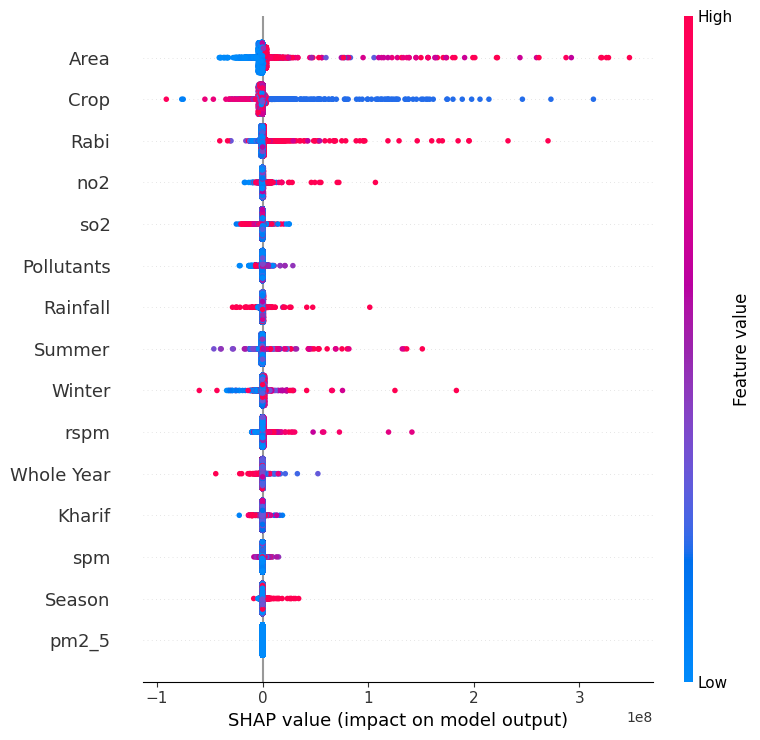

In [ ]:
'''Shap plot for getting the important features in the model'''
explainer = shap.Explainer(model2)  
shap_values = explainer(X_test,check_additivity=False)
shap.summary_plot(shap_values, X_test)

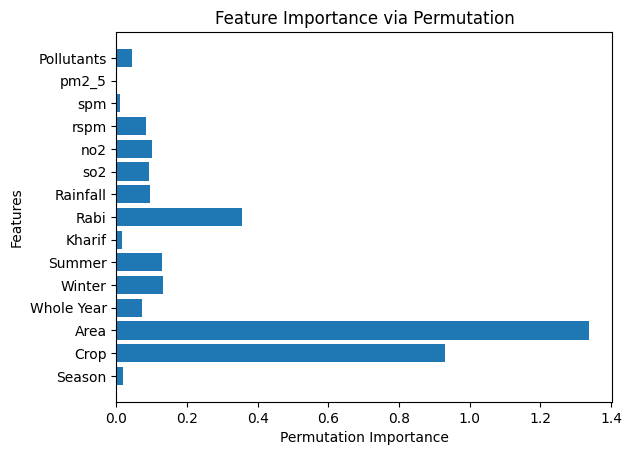

In [ ]:
'''Permutation importance plot also similar to the shap plot offers similar insights'''
perm_importance = permutation_importance(model2, X_test, y_test, scoring='r2', random_state=42)
plt.barh(X_test.columns, perm_importance.importances_mean)
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Feature Importance via Permutation")
plt.show()
